In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 第一題：算閏年

In [2]:
def year(x):
    if x%4 == 0:
        if x%100 == 0 and x%400 != 0:
            print("不是閏年")
        else:
            print("是閏年")
    else:
        print("不是閏年")

In [3]:
year(2000)

是閏年


In [4]:
year(1900)

不是閏年


### NOTE&PROBLEM ：

# 第二題：矩陣加法、乘法

In [5]:
mat_1 = np.matrix(np.random.randint(0,100,size=(5,5)))
mat_2 = np.matrix(np.random.randint(0,100,size=(5,5)))

In [6]:
mat_1

matrix([[ 6, 67, 35,  1, 35],
        [ 1, 31, 13, 39, 27],
        [98,  4, 48, 23, 59],
        [63, 57, 14, 88, 49],
        [24, 31, 64, 70, 80]])

In [7]:
mat_2

matrix([[99, 37, 35, 43,  3],
        [66, 77, 63, 55, 44],
        [ 9, 18, 22, 29, 25],
        [ 0, 80, 30, 14, 93],
        [95, 12, 90, 82,  9]])

## 矩陣加法

In [8]:
def matplus(x,y):
    return x+y

In [9]:
matplus(mat_1,mat_2)

matrix([[105, 104,  70,  44,  38],
        [ 67, 108,  76,  94,  71],
        [107,  22,  70,  52,  84],
        [ 63, 137,  44, 102, 142],
        [119,  43, 154, 152,  89]])

## 矩陣乘法

In [10]:
def matmult(x,y):
    return np.dot(x,y)

In [11]:
matmult(mat_1,mat_2)

matrix([[ 8656,  6511,  8381,  7842,  4249],
        [ 4827,  6102,  5874,  4885,  5562],
        [16003,  7346, 10738, 10986,  4340],
        [14780, 14600, 13154, 11500, 11672],
        [12598, 10987, 13501, 12133, 10266]])

### NOTE&PROBLEM ：

# 第三題：錄取分數表格

In [12]:
sub =  ["國文", "英文", "數甲", "數乙", "物理", "化學", "生物", "歷史", "地理", "公民"]
gra = np.array([86.5, 79.4, 88.2, 96.5, 86.3, 76.8, 96.1, 78.5, 82.4, 88.6])
wei = {
"土語系": [2, 2, 0, 1, 0, 0, 0, 1, 1, 0],
"財政系": [1, 1.5, 0, 1.5, 0, 0, 0, 0, 0, 0],
"金融系": [1, 1.5, 0, 2, 0, 0, 0, 0, 0, 0],
"國貿系": [1.5, 2, 0, 2, 0, 0, 0, 0, 0, 0],
"會計系": [1.5, 2, 0, 2, 0, 0, 0, 1, 1, 0],
"法律系": [1, 2, 0, 1, 0, 0, 0, 1, 0, 1],
"公行系": [1, 1.5, 0, 1.25, 0, 0, 0, 0, 0, 1.25],
"應數系": [1, 1, 1.5, 0, 1, 1, 0, 0, 0, 0],
"教育系": [1.5, 2, 0, 1.25, 0, 0, 0, 1, 1, 0]
}

df_wei = pd.DataFrame(data=wei,index=sub)#先做字典的DataFrame

### 解法一：題目要求的解法

In [13]:
weigra_1=[] #做一個空的list裝各系的加權總分
for key,value in wei.items(): #遍訪加權字典的key和value
    weigrasum_1 = np.dot(np.array(value),gra) #將權重與各科分數進行內積處理做成加權分數
    weigra_1 += [weigrasum_1]
    
df_weigra_1 = pd.DataFrame(data=weigra_1,columns=["加權分數"],index=wei) #將加權分數做成另個DataFrame
df_wei_t=df_wei.T #將字典的DataFrame反轉

df1 = pd.concat([df_wei_t,df_weigra_1],axis=1) #將兩個DataFrame二維資料合成
df1

,國文,英文,數甲,數乙,物理,化學,生物,歷史,地理,公民,加權分數
土語系,2.0,2.0,0.0,1.00,0.0,0.0,0.0,1.0,1.0,0.00,589.200
財政系,1.0,1.5,0.0,1.50,0.0,0.0,0.0,0.0,0.0,0.00,350.350
金融系,1.0,1.5,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.00,398.600
國貿系,1.5,2.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.00,481.550
會計系,1.5,2.0,0.0,2.00,0.0,0.0,0.0,1.0,1.0,0.00,642.450
法律系,1.0,2.0,0.0,1.00,0.0,0.0,0.0,1.0,0.0,1.00,508.900
公行系,1.0,1.5,0.0,1.25,0.0,0.0,0.0,0.0,0.0,1.25,436.975
應數系,1.0,1.0,1.5,0.00,1.0,1.0,0.0,0.0,0.0,0.00,461.300
教育系,1.5,2.0,0.0,1.25,0.0,0.0,0.0,1.0,1.0,0.00,570.075


### 解法二：如果把各科加權後分數直接呈現在表格上......

In [14]:
weidata = [] #做一個空的list裝各科加權後的分數
for i in range(10): #做各科加權後分數的資料（為一個二維的串列）
    y = np.array(df_wei.iloc[i])
    x = y*gra[i]
    weidata.append(x)
weighteddata = np.array(weidata).T

weigra_2=[] #做一個空的list裝各系的加權總分
for i in range(9):
    weigrasum_2 = np.sum(weighteddata[i])
    weigra_2.append(weigrasum_2)

Result = np.insert(weighteddata,10,np.array(weigra_2),axis=1)
sub += ["加權分數"] #這邊最大的缺點就是當重複執行這個cell時，"加權分數"這個元素會一直重複加到list裡面
df2 = pd.DataFrame(data=Result,columns=sub,index=wei)
df2

,國文,英文,數甲,數乙,物理,化學,生物,歷史,地理,公民,加權分數
土語系,173.00,158.8,0.0,96.500,0.0,0.0,0.0,78.5,82.4,0.00,589.200
財政系,86.50,119.1,0.0,144.750,0.0,0.0,0.0,0.0,0.0,0.00,350.350
金融系,86.50,119.1,0.0,193.000,0.0,0.0,0.0,0.0,0.0,0.00,398.600
國貿系,129.75,158.8,0.0,193.000,0.0,0.0,0.0,0.0,0.0,0.00,481.550
會計系,129.75,158.8,0.0,193.000,0.0,0.0,0.0,78.5,82.4,0.00,642.450
法律系,86.50,158.8,0.0,96.500,0.0,0.0,0.0,78.5,0.0,88.60,508.900
公行系,86.50,119.1,0.0,120.625,0.0,0.0,0.0,0.0,0.0,110.75,436.975
應數系,86.50,79.4,132.3,0.000,86.3,76.8,0.0,0.0,0.0,0.00,461.300
教育系,129.75,158.8,0.0,120.625,0.0,0.0,0.0,78.5,82.4,0.00,570.075


### NOTE&PROBLEM ：

# 挑戰題一：Bubble Sort

In [15]:
def bubble_sort(x):
    n = len(x) #先取串列長度
    for i in range(n): #利用迴圈遍訪每一個串列元素
        for j in range(n-i-1): #把最大的數搬到最右邊
            if x[j] > x[j+1]:
                x[j], x[j+1] = x[j+1], x[j]
    print(x)

In [16]:
bubble_sort([64, 34, 25, 12, 22, 11, 90,33,20])

[11, 12, 20, 22, 25, 33, 34, 64, 90]


### NOTE&PROBLEM ：

- 這個BubbleSort的邏輯，   
  就是利用雙重迴圈先把最大的數字送到最右邊，  
  從第一個數開始比，和右邊的數一起比較，  
  如果第一個數是最大的就會一路過關斬將到最右邊，  
  如果遇到比她更大的數就換那個更大的數過關斬將到最右邊，  
  在內層迴圈第一次結束時最大的數就會到最右邊了，  
  再來就會開始執行外層迴圈i=1，  
  將第二大的數撿選出來，  
  以此類推直到外層迴圈結束。

# 自行發揮：Macroeconomic Material of Taiwan

結合所學，這題想要嘗試將國民所得會計帳以堆疊長條圖與折線圖，  
將DataFrame視覺化。  
目的是為了簡易呈現每年台灣的GDP組成為何，  
以下採用的資料來源為中華民國統計資訊網，  
以1981年後的名目GDP作為樣本資料。  

### 淺談國民所得會計帳：

又稱最終用途衡量法，從最終產品購買者的支出面來估計。

GDP = C + I + G + (X - M)

當中C = 私人消費開支，I = 投資總額， G = 政府消費開支，X = 出口毛額，M = 進口毛額

由於出口毛額減去進口毛額等於淨出口（NX），所以公式可表示成：

GDP = C + I + G + NX

In [17]:
#將csv讀入
df_mac = pd.read_csv("1981Macroeco.csv",index_col="Year")#index_col可將欄換成索引

In [18]:
df_mac.head()#檢查DataFrame前面的資料

,Consumer,Government,Investment,Exports,Imports,GDP
Year,,,,,,
1981,926401,294426,548324,917245,881965,1804431
1982,1004087,329929,507763,947554,851310,1938023
1983,1085739,353179,551622,1117529,938623,2169446
1984,1187727,390268,589552,1322333,1071640,2418240
1985,1258803,420605,528202,1345612,1018166,2535056


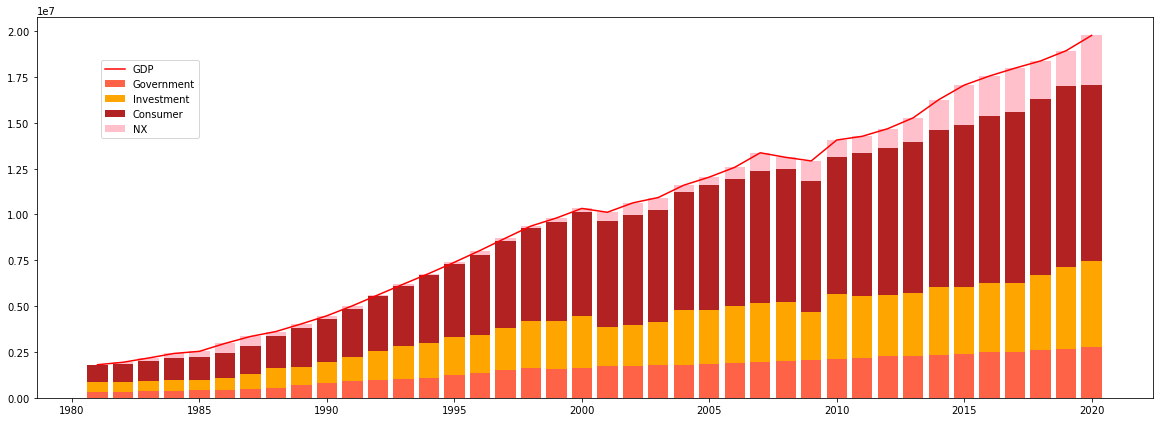

In [19]:
plt.figure(figsize=(20,7)) #設定圖表大小
#設定政府支出
plt.bar(df_mac.index,df_mac['Government'],
        color="tomato",
        label="Government")
#設定投資總額
plt.bar(df_mac.index,df_mac['Investment'],
        color="orange",
        bottom=np.array(df_mac['Government']),#用bottom的方式堆疊長條圖
        label="Investment")
#設定民間消費
plt.bar(df_mac.index,df_mac['Consumer'],
        color="firebrick",
        bottom=np.array(df_mac['Government'])+np.array(df_mac['Investment']),
        label="Consumer")
#設定淨出口
plt.bar(df_mac.index,np.array(df_mac['Exports'])-np.array(df_mac['Imports']),#出口毛額減進口毛額的資料
        color="pink",
        bottom=np.array(df_mac['Government'])+np.array(df_mac['Investment'])+np.array(df_mac['Consumer']),
        label="NX")
#設定GDP
plt.plot(df_mac.index,df_mac['GDP'],
         color="red",
         label="GDP")
#設定Legend
plt.legend(bbox_to_anchor=(0.15,0.9)) #bbox_to_anchor調整Legend的位置
plt.show()

- 由上方長條堆疊圖可知，每年GDP組成的最大宗為民間消費。

- 以上使用的是名目資料，尚未將通貨膨脹的因素考慮進去。  
  所以無法呈現實質經濟成長率。